In [2]:
import pandas as pd


df = pd.read_csv("https://covidtracking.com/api/v1/states/daily.csv")

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [2]:
state_df = df[df["state"] == "NV"]

In [7]:
state_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12060f5c0>,
      dtype=object)

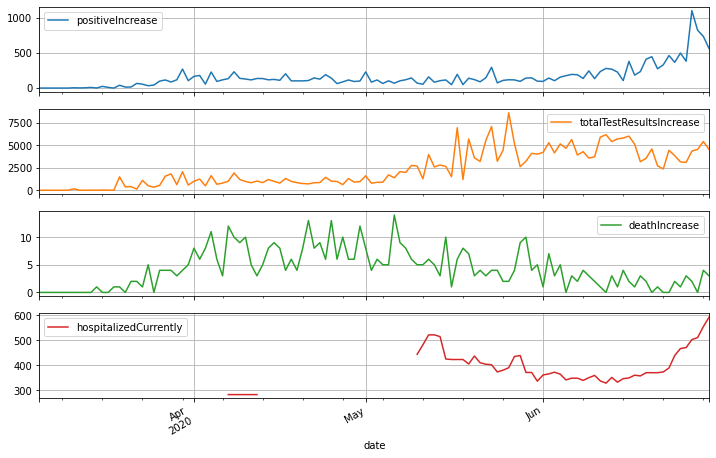

In [55]:
state_df[["date",
          "positiveIncrease",
          "totalTestResultsIncrease",
          "deathIncrease",
          "hospitalizedCurrently"]].plot(x="date",
                                          subplots=True,
                                        figsize=(12,8),
                                        grid=True)

In [32]:
state_df['positivity_rate'] = state_df['positiveIncrease'] / state_df['totalTestResultsIncrease']

/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


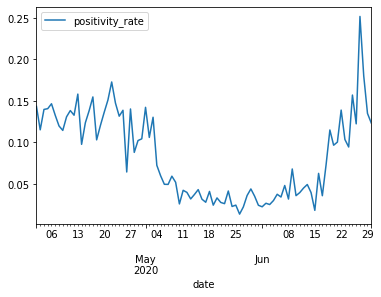

In [44]:
state_df.loc[:,'positivity_rate_SMA7'] = state_df.loc[:,'positivity_rate'].rolling(7).mean()

/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/hectorurtubia/.local/share/virtualenvs/coviddatajupyter-SE-uf2uP/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


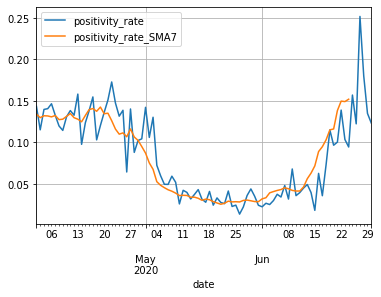

In [53]:
state_df[['date','positivity_rate','positivity_rate_SMA7']][:90].plot(x='date',grid=True)